In [1]:
from Precode2 import *
import numpy

data = np.load('AllSamples.npy')

In [10]:
k1,i_point1,k2,i_point2 = initial_S2('7088') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[2.04945194 2.75937105]
6
[6.39627447 1.24125663]


In [4]:
# Euclidean distance
def dist(centroid, point):
    return np.sqrt((centroid[0]-point[0])**2 + (centroid[1]-point[1])**2)
    

In [14]:
# intiate centoris
centeriods = ([i_point1])
# print(centeriods)
def init_centorids(k, centeriods, data):
    dist_arr = np.zeros(shape = (k,len(data)))
    max_avg =  np.zeros(shape = (len(data)))
    max_inx = []
    a = k
#     print(k)
    # first rand centorid
    while True:
        if len(centeriods) == 1:
            for i in range(len(data)):
                d = dist(centeriods[0], data[i])
                dist_arr[0][i] = d
#             max_inx = dist_arr[0].index(max(dist_arr[0]))  
            max_inx = dist_arr[0].argmax()
#             print(max_inx)
            centeriods.append(data[max_inx])
#             return len(centeriods)
#             return centeriods
        else:
#             print("A = ",a)
            for index in range(1, k):
#                 print("index ", index)
                # loop over all points to get max dist avg
                for i in range(len(data)):
                    d = dist(centeriods[index], data[i])
                    dist_arr[index][i] = d
#                 print("dist of 1 = ",dist_arr, " index =", index)
                # get avg dist
#                 max_avg = dist_arr[0]
                for c in range (len(centeriods)):
#                     print("c ",c)
                    max_avg = dist_arr[c] + max_avg
                max_avg = max_avg / len(centeriods)
                max_inx = max_avg.argmax() 
                centeriods.append(data[max_inx])
#                 print("len", len(centeriods))
                if len(centeriods) == k:
                    return centeriods
#         print(len(centeriods))
        if len(centeriods) == k:
            return centeriods
#         a = a - 1
    return centeriods
print(init_centorids(k2, [i_point2], data))

6
[array([6.39627447, 1.24125663]), array([2.95297924, 9.65073899]), array([9.26998864, 9.62492869]), array([ 3.85212146, -1.08715226]), array([ 3.04101702, -0.36138487]), array([9.26998864, 9.62492869])]


In [18]:
def compute_sse(data, centroids, point_cluster):
    # Initialise SSE 
    sse = 0
    
    # Compute the squared distance for each data point and add. 
    for i,x in enumerate(data):
    	# Get the associated centroid for data point
        centroid = centroids[point_cluster[i]]
                
        # Compute the Distance to the centroid
        d = abs(dist(x, centroid))
        
        # Add to the total distance
        sse += d**2
    
#     sse /= len(data)
    return sse

# List to store SSE for each iteration 
sse_list = []

# array to hold each index point cluster
point_cluster = [0] * len(data)
# kmeans
def kmeans(k, centroids, data):
       
    while True:
        old_centriods = centroids.copy()
        # loop on all points
        for i, point in enumerate(data):
            # min distance
            min_d = 100
            # min cluster distance index
            min_cluster = 0
            # loop over centorids and compute distance and assign min distance to points
            for c, centroid in enumerate(centroids):
                d = dist(centroid, point)
                if min_d > d :
                    min_d = d
                    min_cluster = c
            # assgin points to clusters    
            point_cluster[i] = min_cluster
        # loop over to clsuter points into groups
        for c in range(len(centroids)):
            # Get all the data points belonging to a particular cluster
            cluster_data = [data[x] for x in range(len(data)) if point_cluster[x] == c]
            # Initialise the list to hold the new centroid
            new_centroids = [0] * len(centroids[0])
            # compute new centroids
            for new_centroid in range(2):
                dim_sum = [x[new_centroid] for x in cluster_data]
                if len(dim_sum) > 0:
                    dim_sum = sum(dim_sum) / len(dim_sum) 
                    new_centroids[new_centroid] = dim_sum
                else:
                    new_centroids = centroids[c]
            centroids[c] = new_centroids
        # compute sse
        sse = compute_sse(data, centroids, point_cluster)
        sse_list.append(sse)
        # stop condition
        if np.array_equal(old_centriods, centroids):
            return centroids
    return centroids

6
[[7.414192434680615, 2.3216911383868664], [2.5633381461259046, 6.978224800606624], [5.464277356727894, 6.837713536435891], [3.145061482959145, 0.9077065486588153], [3.4955665791995627, 3.5661123157286907], [7.756483249146484, 8.556689279063415]]
476.11875167635293


IndexError: list index out of range

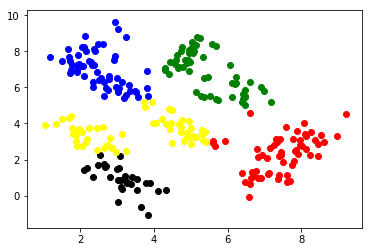

In [19]:
import matplotlib.pyplot as plt

centroids = kmeans(k2, init_centorids(k2, [i_point2], data), data)
print (centroids)
print(sse_list[-1])
colors = ['red', 'blue', 'green', 'black', 'yellow']
for c in range(len(centroids)):
    cluster_members = [data[i] for i in range(len(data)) if point_cluster[i] == c]    
    cluster_members = np.array(cluster_members)
    plt.scatter(cluster_members[:, 0],cluster_members[:, 1]  , color = colors[c])
plt.scatter(centroids[:, 0],centroids[:, 1],marker = "x", s=150,linewidths = 5, zorder = 10, c="black")
plt.show()